In [81]:
# import dependencies
from path import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score,accuracy_score

%matplotlib inline

In [82]:
!pwd

/home/sami/education/DataScience/1-UT/Capstone/capstone-project-SE-1/capstone-project


In [83]:
merged_covid_df = pd.read_csv("resources/merged_covid.csv")
owid_df = pd.read_csv("resources/raw/owid-covid-data(Aug31,2020).csv")

In [84]:
merged_covid_df.head()

,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,2.0,0.0,0.0,0.00,0.00,2.56,3.03,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,2.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,4.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0


In [85]:
owid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [86]:
owid_reduced_df = owid_df[["iso_code","date","population","population_density","median_age"]]
owid_reduced_df

,iso_code,date,population,population_density,median_age
0,ABW,2020-03-13,106766.0,584.8,41.2
1,ABW,2020-03-19,106766.0,584.8,41.2
2,ABW,2020-03-20,106766.0,584.8,41.2
3,ABW,2020-03-21,106766.0,584.8,41.2
4,ABW,2020-03-22,106766.0,584.8,41.2
...,...,...,...,...,...
40743,NaN,2020-08-27,NaN,NaN,NaN
40744,NaN,2020-08-28,NaN,NaN,NaN
40745,NaN,2020-08-29,NaN,NaN,NaN
40746,NaN,2020-08-30,NaN,NaN,NaN


In [87]:
df_pop = pd.merge(merged_covid_df,owid_reduced_df,left_on=["iso_code","date_updated"],right_on=["iso_code","date"])

In [88]:
df_pop.drop(["date"],axis=1,inplace=True)

In [89]:
df_pop.head()

,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated,population,population_density,median_age
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,2.0,0.0,0.0,0.00,0.00,2.56,3.03,0.0,106766.0,584.8,41.2
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,2.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0,106766.0,584.8,41.2
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,4.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0,106766.0,584.8,41.2
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0,106766.0,584.8,41.2
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0,106766.0,584.8,41.2


In [90]:
# load in the files
file = Path("resources/merged_covid.csv")
#file1= Path("resources/government_regulation.csv")
#file2= Path("resources/covid_stats.csv")
#file3= Path("resources/merged_covid_stats_population.csv")

# read the files
df= pd.read_csv(file)
# df_gov=pd.read_csv(file1)
#df_st=pd.read_csv(file2)
#df_pop=pd.read_csv(file3)


In [91]:
# Check merged_covid.csv
print(df.dtypes)
print(df.shape)

# Display df
df.head()

date_updated                        object
iso_code                            object
continent                           object
location                            object
new_cases                          float64
new_deaths                         float64
new_tests                          float64
total_cases_updated                float64
total_deaths_updated               float64
total_tests_updated                float64
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
dtype: object
(34927, 15)


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,2.0,0.0,0.0,0.00,0.00,2.56,3.03,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,2.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,4.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0


In [92]:
# Check df_gov
print(df_gov.shape)
print(df_gov.dtypes)

# Display df
df_gov.head()



(57340, 8)
Date_updated                        object
CountryName                         object
CountryCode                         object
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
dtype: object


,Date_updated,CountryName,CountryCode,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
0,2020-01-01,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,Aruba,ABW,0.0,0.0,0.0,0.0,0.0


In [93]:
# Check df_gov
print(df_st.shape)
print(df_st.dtypes)

# Display df
df_st.head()

(34927, 10)
date_updated             object
iso_code                 object
continent                object
location                 object
new_cases               float64
new_deaths              float64
new_tests               float64
total_cases_updated     float64
total_deaths_updated    float64
total_tests_updated     float64
dtype: object


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,2.0,0.0,0.0
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,2.0,0.0,0.0
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,4.0,0.0,0.0
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0


In [94]:
# check merged df for null values.
df.describe()

,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated
count,34927.000000,34927.000000,3.492700e+04,3.473700e+04,34737.000000,3.492700e+04,34188.000000,34188.000000,34067.000000,34188.000000,33247.000000
mean,720.074985,24.177484,7.846371e+03,4.411066e+04,1972.060829,5.356132e+05,57.641774,63.675131,55.159871,57.948158,40.388982
std,4196.769148,133.441729,5.085007e+04,2.614812e+05,10168.166866,3.373260e+06,28.011408,28.357922,23.983890,25.328905,32.512515
min,-2461.000000,-1918.000000,-3.743000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,4.600000e+01,0.000000,0.000000e+00,38.890000,48.810000,44.870000,44.700000,0.000000
50%,12.000000,0.000000,0.000000e+00,1.060000e+03,21.000000,0.000000e+00,64.350000,71.430000,61.540000,64.390000,50.000000
75%,178.500000,3.000000,1.463500e+03,1.065300e+04,233.000000,1.312215e+05,79.630000,84.520000,72.760000,77.270000,75.000000
max,78761.000000,4928.000000,1.194086e+06,5.997163e+06,183069.000000,8.389842e+07,100.000000,100.000000,96.150000,100.000000,100.000000


In [95]:
# Check merged df with pop df.
print(df_pop.shape)
print(df_pop.dtypes)
df_pop.head()

(34927, 18)
date_updated                        object
iso_code                            object
continent                           object
location                            object
new_cases                          float64
new_deaths                         float64
new_tests                          float64
total_cases_updated                float64
total_deaths_updated               float64
total_tests_updated                float64
StringencyIndex_updated            float64
StringencyLegacyIndex_updated      float64
GovernmentResponseIndex_updated    float64
ContainmentHealthIndex_updated     float64
EconomicSupportIndex_updated       float64
population                         float64
population_density                 float64
median_age                         float64
dtype: object


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated,population,population_density,median_age
0,2020-03-13,ABW,North America,Aruba,2.0,0.0,0.0,2.0,0.0,0.0,0.00,0.00,2.56,3.03,0.0,106766.0,584.8,41.2
1,2020-03-19,ABW,North America,Aruba,0.0,0.0,0.0,2.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0,106766.0,584.8,41.2
2,2020-03-20,ABW,North America,Aruba,2.0,0.0,0.0,4.0,0.0,0.0,33.33,42.86,29.49,34.85,0.0,106766.0,584.8,41.2
3,2020-03-21,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0,106766.0,584.8,41.2
4,2020-03-22,ABW,North America,Aruba,0.0,0.0,0.0,4.0,0.0,0.0,44.44,60.71,37.18,43.94,0.0,106766.0,584.8,41.2


In [96]:
# Create a df to test impact of some features on 'total deaths'
df_death_ml=df_pop[['population','population_density','median_age','total_cases_updated','StringencyIndex_updated','total_deaths_updated']]
df_death_ml

,population,population_density,median_age,total_cases_updated,StringencyIndex_updated,total_deaths_updated
0,106766.0,584.800,41.2,2.0,0.00,0.0
1,106766.0,584.800,41.2,2.0,33.33,0.0
2,106766.0,584.800,41.2,4.0,33.33,0.0
3,106766.0,584.800,41.2,4.0,44.44,0.0
4,106766.0,584.800,41.2,4.0,44.44,0.0
...,...,...,...,...,...,...
34922,14862927.0,42.729,19.6,6251.0,80.56,179.0
34923,14862927.0,42.729,19.6,6292.0,80.56,189.0
34924,14862927.0,42.729,19.6,6388.0,80.56,195.0
34925,14862927.0,42.729,19.6,6406.0,80.56,196.0


In [97]:
df_death_ml.dtypes

population                 float64
population_density         float64
median_age                 float64
total_cases_updated        float64
StringencyIndex_updated    float64
total_deaths_updated       float64
dtype: object

In [98]:
df_death_ml.shape

(34927, 6)

In [99]:
df_death_ml=df_death_ml.dropna(how='any')
df_death_ml.shape

(31411, 6)

In [100]:
# Create a df to test impact of some features on 'total cases'
df_cases_ml=df_pop[['population','population_density','median_age','ContainmentHealthIndex_updated','StringencyIndex_updated','total_cases_updated']]
df_cases_ml

,population,population_density,median_age,ContainmentHealthIndex_updated,StringencyIndex_updated,total_cases_updated
0,106766.0,584.800,41.2,3.03,0.00,2.0
1,106766.0,584.800,41.2,34.85,33.33,2.0
2,106766.0,584.800,41.2,34.85,33.33,4.0
3,106766.0,584.800,41.2,43.94,44.44,4.0
4,106766.0,584.800,41.2,43.94,44.44,4.0
...,...,...,...,...,...,...
34922,14862927.0,42.729,19.6,73.48,80.56,6251.0
34923,14862927.0,42.729,19.6,73.48,80.56,6292.0
34924,14862927.0,42.729,19.6,73.48,80.56,6388.0
34925,14862927.0,42.729,19.6,73.48,80.56,6406.0


In [101]:
# create features(X) and target(y) sets
X = df_death_ml.drop(['total_deaths_updated'],axis=1).values

y = df_death_ml['total_deaths_updated'].values
y = y.reshape(-1,1)

In [102]:
X.shape

(31411, 5)

In [104]:
# create training and testing datasets
# train 95% of data, test 5%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# scale data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Y_scaler = StandardScaler()
Y_scaler.fit(y_train)
y_train_scaled = Y_scaler.transform(y_train)
y_test_scaled = Y_scaler.transform(y_test)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
933/933 [==============================] - 2s 2ms/step - loss: 0.4817 - accuracy: 0.0000e+00
Epoch 2/120
933/933 [==============================] - 2s 2ms/step - loss: 0.1304 - accuracy: 0.0000e+00
Epoch 3/120
933/933 [==============================] - 2s 2ms/step - loss: 0.1178 - accuracy: 0.0000e+00
Epoch 4/120
933/933 [==============================] - 2s 2ms/step - loss: 0.1120 - accuracy: 0.0000e+00
Epoch 5/120
933/933 [==============================] - 2s 2ms/step - loss: 0.1080 - accuracy: 0.0000

933/933 [==============================] - 2s 2ms/step - loss: 0.0707 - accuracy: 0.0000e+00
Epoch 73/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0709 - accuracy: 0.0000e+00
Epoch 74/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0706 - accuracy: 0.0000e+00
Epoch 75/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0702 - accuracy: 0.0000e+00
Epoch 76/120
933/933 [==============================] - 3s 3ms/step - loss: 0.0702 - accuracy: 0.0000e+00
Epoch 77/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0703 - accuracy: 0.0000e+00
Epoch 78/120
933/933 [==============================] - 3s 3ms/step - loss: 0.0701 - accuracy: 0.0000e+00
Epoch 79/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0702 - accuracy: 0.0000e+00
Epoch 80/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0702 - accuracy: 0.0000e+00
Epoch 81/120
933/933 [==============================] - 2s 

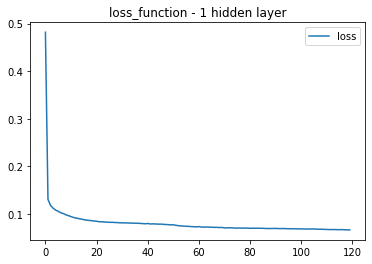

0.9349016041327304
0.9424965402381689


In [107]:
# define model - shallow neural net
number_hidden_nodes = 10
number_input_features = 5

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu"))
nn.add(Dense(1, activation="linear"))

nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=120)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 6         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
933/933 [==============================] - 3s 3ms/step - loss: 0.3576 - acc: 0.0000e+00
Epoch 2/120
933/933 [==============================] - 2s 3ms/step - loss: 0.1050 - acc: 0.0000e+00
Epoch 3/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0949 - acc: 0.0000e+00
Epoch 4/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0890 - ac

933/933 [==============================] - 2s 3ms/step - loss: 0.0058 - acc: 0.0000e+00
Epoch 75/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0060 - acc: 0.0000e+00
Epoch 76/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0057 - acc: 0.0000e+00
Epoch 77/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0062 - acc: 0.0000e+00
Epoch 78/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0055 - acc: 0.0000e+00
Epoch 79/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0054 - acc: 0.0000e+00
Epoch 80/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0056 - acc: 0.0000e+00
Epoch 81/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0058 - acc: 0.0000e+00
Epoch 82/120
933/933 [==============================] - 2s 3ms/step - loss: 0.0053 - acc: 0.0000e+00
Epoch 83/120
933/933 [==============================] - 2s 2ms/step - loss: 0.0056 - acc: 0.0000e+00
Epo

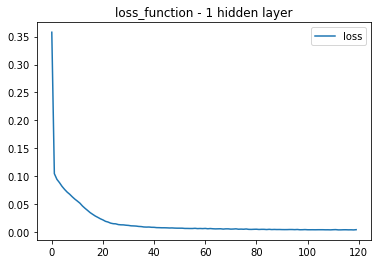

0.99548508876933
0.9954664155637508


In [109]:
# Define the model - deep neural net
number_input_features = 5
hidden_nodes_layer1 = 15 # 10
hidden_nodes_layer2 = 5

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))


nn.summary()

# compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["acc"])

# train model
model_1 = nn.fit(X_train_scaled, y_train_scaled, epochs=120)

# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

print(r2_score(y_train_scaled, y_train_pred))
print(r2_score(y_test_scaled, y_test_pred))